# 感知机的原理性证明

感知机主要解决如下问题：

给定数据点$x,x \in \mathbb{R}^d$和标签$y \in \{-1,+1\}$，我们是否可以用线性函数$f(x) = w^Tx+b$使得对于所有的$x$都有当且仅当$y=1$是有$f(x)>0$，当且仅当$y=-1$时有$f(x)<0$。

## 可分离的分类问题

### 伪造数据点

In [135]:
%matplotlib inline
import mxnet as mx
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

from mxnet import nd
from mxnet import autograd
mx.random.seed(1)

In [136]:
# 生成伪造数据
def getfake(samples, dimension, epsilon):
    fakeW = nd.random.normal(shape=(dimension))
    fakeb = nd.random.normal(shape=(1))
    fakeW = fakeW / nd.norm(fakeW)
    
    X = nd.zeros(shape=(samples, dimension))
    y = nd.zeros(shape=samples)

    i = 0
    while(i < samples):
        tmp = nd.random.normal(shape=(1, dimension))
        margin = nd.dot(tmp, fakeW) + fakeb
        if (nd.abs(margin).asscalar() > epsilon) & (nd.norm(margin).asscalar() < 3): # 限定生成数据的范围
            X[i, :] = tmp[0]
            y[i] = 1 if margin > 0 else -1
            i += 1
    return X, y

In [176]:
# test
fakeX, fakey = getfake(50, 2, 0.3)

In [144]:
# 画出伪造数据点
def plot_data(fakeX, fakey):
#     plt.figure(figsize=(8,8))
    for (x, y) in zip(fakeX, fakey):
        if y.asscalar() == 1:
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color='r')
        else:
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color='b')
    plt.grid(True)

In [174]:
for (x,y) in zip(fakeX, fakey):
    print(x)
    print(y)
    break


[-0.0832829  -0.01068318]
<NDArray 2 @cpu(0)>

[-1.]
<NDArray 1 @cpu(0)>


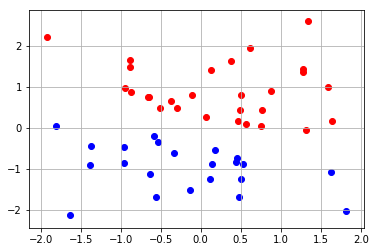

In [177]:
plot_data(fakeX, fakey)

## 感知机收敛定理

**<font color="red">感知机收敛定理：</font>** 给定训练数据集$\{(x_1,y_1),...,(x_N,y_N)\}$，其中$y \in \{-1,+1\}$，一定存在参数$(w^*,b^*$)使得对所有的数据集有**$y_i( (w^*)^T x_i+b^*) \ge \epsilon$**恒成立，并且有$\|w^*\| \le 1,b^2 \le 1$，算法最多在$2 (R^2 + 1)/\epsilon^2$次迭代后收敛。

有时感知器收敛定理写成没有偏差$b$。在这种情况下，许多事情在证明和约束中得到简化，因为我们可以取消常数项。取消常数项后，收敛次数的上限变成**$t \leq R^2/\epsilon^2$**。

此算法的优点是不依赖于数据的维度。


<font color="red">**李航书上对于感知机学习算法的理解：**</font>

感知机学习算法的原始形式：<br>
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2)...,(x_N,y_N)\}$，其中$x_i \in \chi = \mathbb{R}^n,y_i \in \mathbf{y} = \{-1,+1\}$，学习率$\eta(0\le\eta\le1);$<br>
输出：$w, b$；感知机模型$f(x) = sign(w \cdot x + b)$.<br>
* (1)选取初值$w_0,b_0$<br>
* (2)在训练集中选取数据$(x_i,y_i)$<br>
* (3)如果$y_i(w \cdot x_i + b) \le 0$(即误分类点)
$$w \leftarrow w + \eta y_ix_i \\ b \leftarrow b+\eta y_i$$
* (4)转至(2)，直至训练集中没有误分类点.

**这种学习算法直观上有如下解释**：当一个实例点被误分类，即位于分离超平面的错误一侧时，则调整$w,b$的值，使分离超平面向该误分类点的一侧移动，以减少该误分类点与超平面之间的距离，直至超平面越过该误分类点使其被正确分类。

In [94]:
def perceptron(w, b, x, y):
    if (y * (nd.dot(w,x) + b)).asscalar() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

## ``np.meshgrid``

其作用主要是用来生成网格点数据。

http://www.cnblogs.com/lemonbit/p/7593898.html

meshgrid的作用是根据传入的两个一维数组参数生成两个数组元素的列表。如果第一个参数是xarray，维度是xdimesion，第二个参数是yarray，维度是ydimesion。那么生成的第一个二维数组是以xarray为行，ydimesion行的向量；而第二个二维数组是以yarray的转置为列，xdimesion列的向量。即最终生成的两个矩阵的维度均为**(ydimension, xdimension)**。

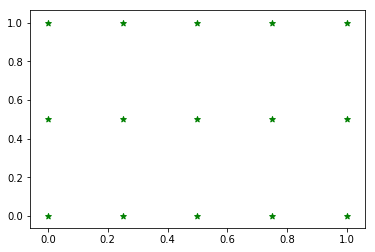

In [169]:
# test
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 3)
xx, yy = np.meshgrid(x, y)
plt.scatter(xx, yy, marker='*', color="green")
plt.show()

## ``plt.contour``

主要用来画等高线图

In [171]:
# 没看懂
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = nd.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = nd.array(xx)
    zz[:,:,1] = nd.array(yy)
    vv = nd.dot(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv.asnumpy())
    plt.clabel(CS, inline=1, fontsize=10)

遇到误分类点(1.339690, 2.606536).
误分类点为[ 1.33969033  2.60653567], label = 1.0
权重 = [ 1.33969033  2.60653567], 偏置 = 1.0


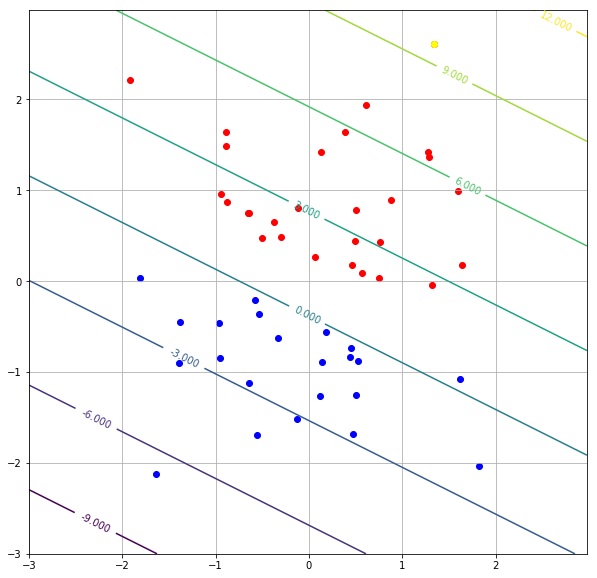

遇到误分类点(1.622752, -1.076566).
误分类点为[ 1.62275195 -1.0765661 ], label = -1.0
权重 = [-0.28306162  3.68310165], 偏置 = 0.0


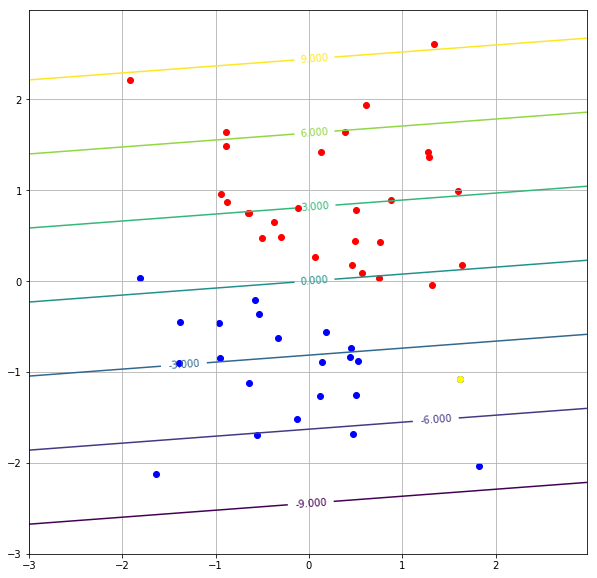

遇到误分类点(1.316769, -0.047818).
误分类点为[ 1.31676912 -0.0478183 ], label = 1.0
权重 = [ 1.0337075   3.63528347], 偏置 = 1.0


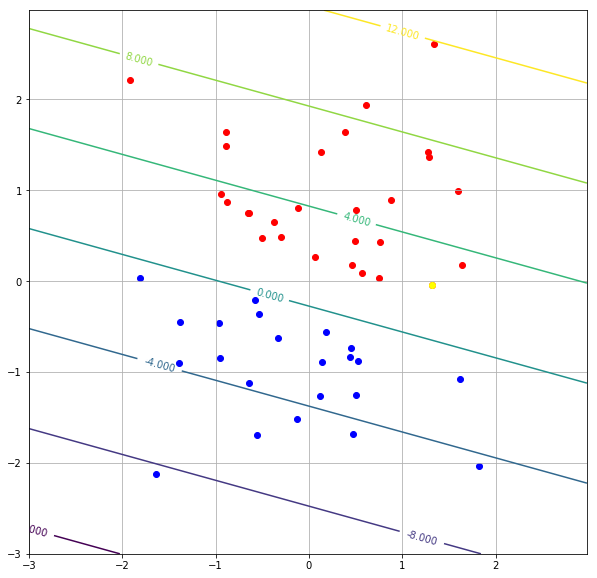

In [178]:
# test
# w,b都初始化为0
w = nd.zeros(shape=2)
b = nd.zeros(shape=1)

for (x,y) in zip(fakeX, fakey):
    result = perceptron(w, b, x, y)
    if result:
        print("遇到误分类点(%f, %f)." % (x[0].asscalar(), x[1].asscalar()))
        print("误分类点为%s, label = %s" % (x.asnumpy(), y.asscalar()))
        print("权重 = %s, 偏置 = %s" % (w.asnumpy(), b.asscalar()))
        plt.figure(figsize=(10, 10))
        plotscore(w, b)
        plot_data(fakeX, fakey)
        plt.scatter(x[0].asscalar(), x[1].asscalar(), color="yellow")
        plt.show()

[ 388.  232.  196.  199.  153.  139.  161.  107.  129.  121.  116.   97.
   78.   97.   68.  103.   80.]


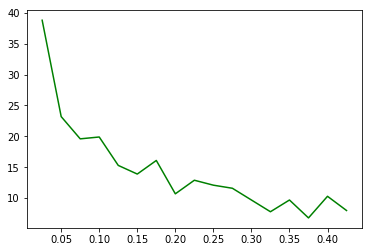

In [134]:
Eps = np.arange(0.025, 0.45, 0.025)
Err = np.zeros(Eps.size)

w = nd.zeros(shape=2)
b = nd.zeros(shape=1)

for j in range(10): # 进行10次，然后取平均，这种通过多次试验然后消除偶然因素的思想一定要掌握(平滑思想)
    for i, epsilon in enumerate(Eps):
        fakeX, fakey = getfake(1000, 2, epsilon)
        for (x, y) in zip(fakeX, fakey):
            Err[i] += perceptron(w, b, x, y) 、、

print(Err)
plt.set_title("Average Numer of updates for Training.")
plt.plot(Eps, Err / 10, color="g")
plt.show()

可以看到随着间隔的不断增大，需要更新的次数(也可以理解为误分类点的个数)呈现下降趋势

这里给出收敛性定理的证明过程：http://gluon.mxnet.io/chapter02_supervised-learning/perceptron.html

**也可以参考李航《统计学习方法》**

感知机算法严格依赖于数据本身是线性可分的，如果这个前提不成立，学习算法将失效。

# 随机梯度下降的原理性证明

感知机算法也可以看做随机梯度下降算法，损失函数为：$\mathrm{max}(0, -y f(x))$。我们称为$hinge\,loss$。当$x$被正确分类时，函数的梯度永远为0；当$x$被误分类时，梯度为$-y$。

我们画出这个函数：

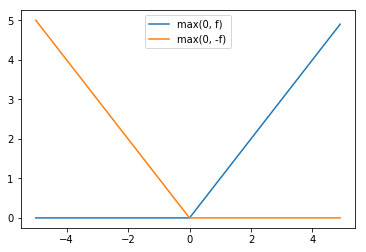

In [193]:
f = np.arange(-5, 5, 0.1)
zeros = np.zeros(shape=f.shape)
lplus = np.max([f, zeros], axis=0)
lmius = np.max([-f, zeros], axis=0)
plt.plot(f, lplus)
plt.plot(f, lmius)
plt.legend(['max(0, f)', 'max(0, -f)'])
plt.show()

## (TODO@ANG) 2018年1月19如15:30